#  Analysing the correlation between health condition and poverty.

In [62]:
# Importing libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_rows', None)

In [63]:
# Loading dataset.
df = pd.read_csv('FRS_Nov_13.csv', low_memory=False)

df.head(20)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Disability Status of the Individual (dis),Not a disabled child / adult / person,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Disabled child / adult / person,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,NaN,NaN,NaN,NaN,NaN,Employment Status of the Adult (high level bre...,Employee,Employee - RSE,Employee - Annotations,Unemployed,Unemployed - RSE,Unemployed - Annotations,Employee,Employee - RSE,Employee - Annotations,Unemployed,Unemployed - RSE,Unemployed - Annotations,NaN
1,Financial Year,Difficulty with mental health,Government office region of the Household in t...,"Main source of Household's total, gross Income","Adult total, net Income received from all sour...",Type of Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002-03,No or none,North East (E12000001),"Wages and salaries (dividend, sc)",Less than £50,Child,..,0.00,NaN,..,0.00,NaN,..,0.00,NaN,..,0.00,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,Working-age,3812,0.00,NaN,18436,0.00,NaN,..,0.00,NaN,1696,0.00,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,Pensioner (spa),..,0.00,NaN,..,0.00,NaN,..,0.00,NaN,..,0.00,NaN,NaN
5,NaN,NaN,NaN,NaN,£50 - £99.99,Child,..,0.00,NaN,..,0.00,NaN,..,0.00,NaN,..,0.00,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,Working-age,12300,0.00,NaN,8359,0.00,NaN,4016,0.00,NaN,3163,0.00,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,Pensioner (spa),..,0.00,NaN,..,0.00,NaN,..,0.00,NaN,..,0.00,NaN,NaN
8,NaN,NaN,NaN,NaN,£100 - £149.99,Child,..,0.00,NaN,..,0.00,NaN,..,0.00,NaN,..,0.00,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,Working-age,19707,0.00,NaN,4115,0.00,NaN,3927,0.00,NaN,..,0.00,NaN,NaN


In [64]:
df.shape

(136082, 19)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136082 entries, 0 to 136081
Data columns (total 19 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Unnamed: 0                                 22 non-null      object 
 1   Unnamed: 1                                 43 non-null      object 
 2   Unnamed: 2                                 505 non-null     object 
 3   Unnamed: 3                                 5041 non-null    object 
 4   Unnamed: 4                                 45361 non-null   object 
 5   Disability Status of the Individual (dis)  136082 non-null  object 
 6   Not a disabled child / adult / person      136081 non-null  object 
 7   Unnamed: 7                                 136081 non-null  object 
 8   Unnamed: 8                                 1 non-null       object 
 9   Unnamed: 9                                 136081 non-null  object 
 10  Unnamed:

In [66]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Disability Status of the Individual (dis),Not a disabled child / adult / person,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Disabled child / adult / person,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,NaN,NaN,NaN,NaN,NaN,Employment Status of the Adult (high level bre...,Employee,Employee - RSE,Employee - Annotations,Unemployed,Unemployed - RSE,Unemployed - Annotations,Employee,Employee - RSE,Employee - Annotations,Unemployed,Unemployed - RSE,Unemployed - Annotations,NaN
1,Financial Year,Difficulty with mental health,Government office region of the Household in t...,"Main source of Household's total, gross Income","Adult total, net Income received from all sour...",Type of Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002-03,No or none,North East (E12000001),"Wages and salaries (dividend, sc)",Less than £50,Child,..,0.00,NaN,..,0.00,NaN,..,0.00,NaN,..,0.00,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,Working-age,3812,0.00,NaN,18436,0.00,NaN,..,0.00,NaN,1696,0.00,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,Pensioner (spa),..,0.00,NaN,..,0.00,NaN,..,0.00,NaN,..,0.00,NaN,NaN


In [67]:
# Replacing column names.
df.columns = [
    "Financial year",
    "Difficulty with mental health",
    "Region",
    "Main source of Income",
    "Adult net income",
    "Type of individual",
    "Not disabled_employee",
    "Extra1",
    "Extra2",
    "Not disabled_unemployed",
    "Extra3",
    "Extra4",
    "Disabled_employee",
    "Extra5",
    "Extra6",
    "Disabled_unemployed",
    "Extra7",
    "Extra8",
    "Extra9"
]

# Dropping unnecessary columns.
df = df.drop(
    columns=[
        "Extra1", 
        "Extra2", 
        "Extra3", 
        "Extra4", 
        "Extra5",
        "Extra6", 
        "Extra7",
        "Extra8", 
        "Extra9"
    ], errors="ignore"
)

# Dropping the first row.
df = df.drop(index=[0, 1]).reset_index(drop=True)

In [68]:
df.head(100)

,Financial year,Difficulty with mental health,Region,Main source of Income,Adult net income,Type of individual,Not disabled_employee,Not disabled_unemployed,Disabled_employee,Disabled_unemployed
0,2002-03,No or none,North East (E12000001),"Wages and salaries (dividend, sc)",Less than £50,Child,..,..,..,..
1,NaN,NaN,NaN,NaN,NaN,Working-age,3812,18436,..,1696
2,NaN,NaN,NaN,NaN,NaN,Pensioner (spa),..,..,..,..
3,NaN,NaN,NaN,NaN,£50 - £99.99,Child,..,..,..,..
4,NaN,NaN,NaN,NaN,NaN,Working-age,12300,8359,4016,3163
5,NaN,NaN,NaN,NaN,NaN,Pensioner (spa),..,..,..,..
6,NaN,NaN,NaN,NaN,£100 - £149.99,Child,..,..,..,..
7,NaN,NaN,NaN,NaN,NaN,Working-age,19707,4115,3927,..
8,NaN,NaN,NaN,NaN,NaN,Pensioner (spa),..,..,..,..
9,NaN,NaN,NaN,NaN,£150 - £199.99,Child,..,..,..,..


In [69]:
# Looking at unique values in the columns.
for col in df.columns.to_list():
    print(f"Unique values of {col} :", df[col].unique())

Unique values of Financial year : ['2002-03' nan '2003-04' '2004-05' '2005-06' '2006-07' '2007-08' '2008-09'
 '2009-10' '2010-11' '2011-12' '2012-13' '2013-14' '2014-15' '2015-16'
 '2016-17' '2017-18' '2018-19' '2019-20' '2020-21 (covid)' '2021-22'
 '2022-23']
Unique values of Difficulty with mental health : ['No or none' nan 'Yes']
Unique values of Region : ['North East (E12000001)' nan 'North West (E12000002)'
 'Yorkshire and The Humber (E12000003)' 'East Midlands (E12000004)'
 'West Midlands (E12000005)' 'East (E12000006)' 'London (E12000007)'
 'South East (E12000008)' 'South West (E12000009)' 'Wales (W92000004)'
 'Scotland (S92000003)' 'Northern Ireland (N92000002)']
Unique values of Main source of Income : ['Wages and salaries (dividend, sc)' nan
 'Self-employed income (dividend, sc)'
 'State Pension plus any Income Support / Pension Credit (sp, spa, ur)'
 'Disability benefits (disben, ur)' 'Tax Credits (ur)'
 'Universal Credit (ur)' 'Other benefits (ur)' 'Non-state pensions (nsp)

In [70]:
df.columns.to_list()[0:5]

['Financial year',
 'Difficulty with mental health',
 'Region',
 'Main source of Income',
 'Adult net income']

In [71]:
# Filling missing values in the 'Financial year', 
# 'Difficulty with mental health', 'Region', 'Main source of Income', 
# and 'Adult net income'.
for col in enumerate(df.columns.to_list()[0:5]):
    df[col[1]] = df[col[1]].ffill()

df.tail()

,Financial year,Difficulty with mental health,Region,Main source of Income,Adult net income,Type of individual,Not disabled_employee,Not disabled_unemployed,Disabled_employee,Disabled_unemployed
136075,2022-23,Yes,Northern Ireland (N92000002),Other sources,£400 - £499.99,Working-age,..,..,..,..
136076,2022-23,Yes,Northern Ireland (N92000002),Other sources,£400 - £499.99,Pensioner (spa),..,..,..,..
136077,2022-23,Yes,Northern Ireland (N92000002),Other sources,£500 or more,Child,..,..,..,..
136078,2022-23,Yes,Northern Ireland (N92000002),Other sources,£500 or more,Working-age,..,..,..,..
136079,2022-23,Yes,Northern Ireland (N92000002),Other sources,£500 or more,Pensioner (spa),..,..,..,..


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136080 entries, 0 to 136079
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   Financial year                 136080 non-null  object
 1   Difficulty with mental health  136080 non-null  object
 2   Region                         136080 non-null  object
 3   Main source of Income          136080 non-null  object
 4   Adult net income               136080 non-null  object
 5   Type of individual             136080 non-null  object
 6   Not disabled_employee          136080 non-null  object
 7   Not disabled_unemployed        136080 non-null  object
 8   Disabled_employee              136080 non-null  object
 9   Disabled_unemployed            136080 non-null  object
dtypes: object(10)
memory usage: 10.4+ MB


In [73]:
df.describe()

,Financial year,Difficulty with mental health,Region,Main source of Income,Adult net income,Type of individual,Not disabled_employee,Not disabled_unemployed,Disabled_employee,Disabled_unemployed
count,136080,136080,136080,136080,136080,136080,136080,136080,136080,136080
unique,21,2,12,10,9,3,8641,3683,4791,1848
top,2002-03,No or none,North East (E12000001),"Wages and salaries (dividend, sc)",Less than £50,Child,..,..,..,..
freq,6480,68040,11340,13608,15120,45360,120067,130535,127165,133239


In [74]:
df.head()

,Financial year,Difficulty with mental health,Region,Main source of Income,Adult net income,Type of individual,Not disabled_employee,Not disabled_unemployed,Disabled_employee,Disabled_unemployed
0,2002-03,No or none,North East (E12000001),"Wages and salaries (dividend, sc)",Less than £50,Child,..,..,..,..
1,2002-03,No or none,North East (E12000001),"Wages and salaries (dividend, sc)",Less than £50,Working-age,3812,18436,..,1696
2,2002-03,No or none,North East (E12000001),"Wages and salaries (dividend, sc)",Less than £50,Pensioner (spa),..,..,..,..
3,2002-03,No or none,North East (E12000001),"Wages and salaries (dividend, sc)",£50 - £99.99,Child,..,..,..,..
4,2002-03,No or none,North East (E12000001),"Wages and salaries (dividend, sc)",£50 - £99.99,Working-age,12300,8359,4016,3163


In [75]:
# Melting the columns.
melted_df = pd.melt(
    df, 
    id_vars=[
        'Financial year', 
        'Difficulty with mental health', 
        'Region', 
        'Main source of Income', 
        'Adult net income', 
        'Type of individual'
    ], value_vars=[
        'Not disabled_employee', 
        'Not disabled_unemployed', 
        'Disabled_employee', 
        'Disabled_unemployed'
    ],var_name='Disability_employment_status', 
    value_name='Population count'
)

melted_df.head()

,Financial year,Difficulty with mental health,Region,Main source of Income,Adult net income,Type of individual,Disability_employment_status,Population count
0,2002-03,No or none,North East (E12000001),"Wages and salaries (dividend, sc)",Less than £50,Child,Not disabled_employee,..
1,2002-03,No or none,North East (E12000001),"Wages and salaries (dividend, sc)",Less than £50,Working-age,Not disabled_employee,3812
2,2002-03,No or none,North East (E12000001),"Wages and salaries (dividend, sc)",Less than £50,Pensioner (spa),Not disabled_employee,..
3,2002-03,No or none,North East (E12000001),"Wages and salaries (dividend, sc)",£50 - £99.99,Child,Not disabled_employee,..
4,2002-03,No or none,North East (E12000001),"Wages and salaries (dividend, sc)",£50 - £99.99,Working-age,Not disabled_employee,12300


In [76]:
melted_df['Disability_employment_status'].unique()

array(['Not disabled_employee', 'Not disabled_unemployed',
       'Disabled_employee', 'Disabled_unemployed'], dtype=object)

In [77]:
# Creating new column called 'Employment status' from mapping 
# 'Disability_employment_status' column.
melted_df['Employment status'] = melted_df[
    'Disability_employment_status'
].map({
    'Not disabled_employee' : 'Employee', 
    'Not disabled_unemployed' : 'Unemployed',
    'Disabled_employee' : 'Employee', 
    'Disabled_unemployed' : 'Unemployed'
})

In [78]:
# Creating new column called 'Disability status' from mapping 
# 'Disability_employment_status' column.
melted_df['Disability status'] = melted_df[
    'Disability_employment_status'
].map({
    'Not disabled_employee' : 'Not disabled', 
    'Not disabled_unemployed' : 'Not disabled',
    'Disabled_employee' : 'Disabled', 
    'Disabled_unemployed' : 'Disabled'
})

In [79]:
# Dropping 'Disability_employment_status' column.
melted_df.drop(columns='Disability_employment_status', axis=1, inplace=True)

In [80]:
melted_df.head()

,Financial year,Difficulty with mental health,Region,Main source of Income,Adult net income,Type of individual,Population count,Employment status,Disability status
0,2002-03,No or none,North East (E12000001),"Wages and salaries (dividend, sc)",Less than £50,Child,..,Employee,Not disabled
1,2002-03,No or none,North East (E12000001),"Wages and salaries (dividend, sc)",Less than £50,Working-age,3812,Employee,Not disabled
2,2002-03,No or none,North East (E12000001),"Wages and salaries (dividend, sc)",Less than £50,Pensioner (spa),..,Employee,Not disabled
3,2002-03,No or none,North East (E12000001),"Wages and salaries (dividend, sc)",£50 - £99.99,Child,..,Employee,Not disabled
4,2002-03,No or none,North East (E12000001),"Wages and salaries (dividend, sc)",£50 - £99.99,Working-age,12300,Employee,Not disabled


In [81]:
melted_df['Financial year'].unique()

array(['2002-03', '2003-04', '2004-05', '2005-06', '2006-07', '2007-08',
       '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14',
       '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20',
       '2020-21 (covid)', '2021-22', '2022-23'], dtype=object)

In [82]:
# Cleaning 'Financial Year' column.
# Extracting the starting year as an integer.
melted_df['Financial year'] = melted_df['Financial year'].str.split('-').\
    str[0].astype(int)

In [83]:
melted_df['Financial year'].unique()

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [84]:
melted_df['Difficulty with mental health'].unique()

array(['No or none', 'Yes'], dtype=object)

In [85]:
# Cleaning 'Difficulty with mental health' column.
melted_df['Difficulty with mental health'] = melted_df[
    'Difficulty with mental health'
].map({
    'No or none' : 'No', 
    'Yes' : 'Yes'
})

In [86]:
melted_df.head()

,Financial year,Difficulty with mental health,Region,Main source of Income,Adult net income,Type of individual,Population count,Employment status,Disability status
0,2002,No,North East (E12000001),"Wages and salaries (dividend, sc)",Less than £50,Child,..,Employee,Not disabled
1,2002,No,North East (E12000001),"Wages and salaries (dividend, sc)",Less than £50,Working-age,3812,Employee,Not disabled
2,2002,No,North East (E12000001),"Wages and salaries (dividend, sc)",Less than £50,Pensioner (spa),..,Employee,Not disabled
3,2002,No,North East (E12000001),"Wages and salaries (dividend, sc)",£50 - £99.99,Child,..,Employee,Not disabled
4,2002,No,North East (E12000001),"Wages and salaries (dividend, sc)",£50 - £99.99,Working-age,12300,Employee,Not disabled


In [87]:
# Looking at unique values in the 'Region' column.
df['Region'].unique()

array(['North East (E12000001)', 'North West (E12000002)',
       'Yorkshire and The Humber (E12000003)',
       'East Midlands (E12000004)', 'West Midlands (E12000005)',
       'East (E12000006)', 'London (E12000007)', 'South East (E12000008)',
       'South West (E12000009)', 'Wales (W92000004)',
       'Scotland (S92000003)', 'Northern Ireland (N92000002)'],
      dtype=object)

In [88]:
# Cleaning 'Region' column data.
melted_df['Region'] = melted_df['Region'].map({
    'North East (E12000001)' : 'North East',
    'North West (E12000002)' : 'North West',
    'Yorkshire and The Humber (E12000003)' : 'Yorkshire and The Humber',
    'East Midlands (E12000004)' : 'East Midlands',
    'West Midlands (E12000005)' : 'West Midlands',
    'East (E12000006)' : 'East',
    'London (E12000007)' : 'London',
    'South East (E12000008)' : 'South East', 
    'South West (E12000009)' : 'South West',
    'Wales (W92000004)' : 'Wales',
    'Scotland (S92000003)' : 'Scotland',
    'Northern Ireland (N92000002)' : 'Northern Ireland'
})

In [89]:
# Looking at unique values in 'Main source of Income' column.
melted_df['Main source of Income'].unique()

array(['Wages and salaries (dividend, sc)',
       'Self-employed income (dividend, sc)',
       'State Pension plus any Income Support / Pension Credit (sp, spa, ur)',
       'Disability benefits (disben, ur)', 'Tax Credits (ur)',
       'Universal Credit (ur)', 'Other benefits (ur)',
       'Non-state pensions (nsp)', 'Investments', 'Other sources'],
      dtype=object)

In [90]:
# Cleaning 'Main source of Income' column data.
melted_df['Main source of Income'] = melted_df['Main source of Income'].map({
    'Wages and salaries (dividend, sc)' : 'Wages and salaries',
    'Self-employed income (dividend, sc)' : 'Self-employed income',
    'State Pension plus any Income Support / Pension Credit (sp, spa, ur)' : 'State Pension',
    'Disability benefits (disben, ur)' : 'Disability benefits', 
    'Tax Credits (ur)' : 'Tax Credits',
    'Universal Credit (ur)' : 'Universal Credit', 
    'Other benefits (ur)' : 'Other benefits',
    'Non-state pensions (nsp)' : 'Non-state pension', 
    'Investments' : 'Investments', 
    'Other sources' : 'Other sources'
})

In [91]:
melted_df.head()

,Financial year,Difficulty with mental health,Region,Main source of Income,Adult net income,Type of individual,Population count,Employment status,Disability status
0,2002,No,North East,Wages and salaries,Less than £50,Child,..,Employee,Not disabled
1,2002,No,North East,Wages and salaries,Less than £50,Working-age,3812,Employee,Not disabled
2,2002,No,North East,Wages and salaries,Less than £50,Pensioner (spa),..,Employee,Not disabled
3,2002,No,North East,Wages and salaries,£50 - £99.99,Child,..,Employee,Not disabled
4,2002,No,North East,Wages and salaries,£50 - £99.99,Working-age,12300,Employee,Not disabled


In [92]:
# Looking at unique values in 'Adult net income' column.
melted_df['Adult net income'].unique()

array(['Less than £50', '£50 - £99.99', '£100 - £149.99',
       '£150 - £199.99', '£200 - £249.99', '£250 - £299.99',
       '£300 - £399.99', '£400 - £499.99', '£500 or more'], dtype=object)

In [93]:
# Cleaning 'Adult net income' column data.
melted_df['Adult net income'] = melted_df['Adult net income'].map({
    'Less than £50' : '0 - 50',
    '£50 - £99.99' : '50 - 99.99',
    '£100 - £149.99' : '100 - 149.99',
    '£150 - £199.99' : '150 - 199.99',
    '£200 - £249.99' : '200 - 249.99',
    '£250 - £299.99' : '250 - 299.99',
    '£300 - £399.99' : '300 - 399.99',
    '£400 - £499.99' : '400 - 499.99',
    '£500 or more' : '>=500'
})

In [94]:
# Looking at unique values in 'Type of individual' column.
melted_df['Type of individual'].unique()

array(['Child', 'Working-age', 'Pensioner (spa)'], dtype=object)

In [95]:
melted_df['Type of individual'].replace('Pensioner (spa)', 'Pensioner', inplace=True)

/var/folders/1d/rdd8p1pj3fdgs03vysqjbk7c0000gn/T/ipykernel_4791/436747889.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  melted_df['Type of individual'].replace('Pensioner (spa)', 'Pensioner', inplace=True)


In [96]:
melted_df.head()

,Financial year,Difficulty with mental health,Region,Main source of Income,Adult net income,Type of individual,Population count,Employment status,Disability status
0,2002,No,North East,Wages and salaries,0 - 50,Child,..,Employee,Not disabled
1,2002,No,North East,Wages and salaries,0 - 50,Working-age,3812,Employee,Not disabled
2,2002,No,North East,Wages and salaries,0 - 50,Pensioner,..,Employee,Not disabled
3,2002,No,North East,Wages and salaries,50 - 99.99,Child,..,Employee,Not disabled
4,2002,No,North East,Wages and salaries,50 - 99.99,Working-age,12300,Employee,Not disabled


In [97]:
# Looking at data type of the 'Population count' column.
melted_df['Population count'].dtype

dtype('O')

In [98]:
# Turning 'Population count' column into numeric data type and filling 
# missing values from zero.
melted_df['Population count'] = pd.to_numeric(melted_df['Population count'], \
                                            errors='coerce').fillna(0)

In [99]:
melted_df.head()

,Financial year,Difficulty with mental health,Region,Main source of Income,Adult net income,Type of individual,Population count,Employment status,Disability status
0,2002,No,North East,Wages and salaries,0 - 50,Child,0.0,Employee,Not disabled
1,2002,No,North East,Wages and salaries,0 - 50,Working-age,3812.0,Employee,Not disabled
2,2002,No,North East,Wages and salaries,0 - 50,Pensioner,0.0,Employee,Not disabled
3,2002,No,North East,Wages and salaries,50 - 99.99,Child,0.0,Employee,Not disabled
4,2002,No,North East,Wages and salaries,50 - 99.99,Working-age,12300.0,Employee,Not disabled


In [100]:
# Exploring Population Count Over Region by Difficulty with mental health.
mental_health_over_region = melted_df.groupby(['Region','Difficulty with mental health'])['Population count']\
    .sum()
mental_health_over_region

Region                    Difficulty with mental health
East                      No                               51988347.0
                          Yes                               1639285.0
East Midlands             No                               39971926.0
                          Yes                               1336352.0
London                    No                               75056403.0
                          Yes                               1256201.0
North East                No                               21803135.0
                          Yes                                859971.0
North West                No                               60485976.0
                          Yes                               1992777.0
Northern Ireland          No                               14977019.0
                          Yes                                274610.0
Scotland                  No                               47616371.0
                          Yes     

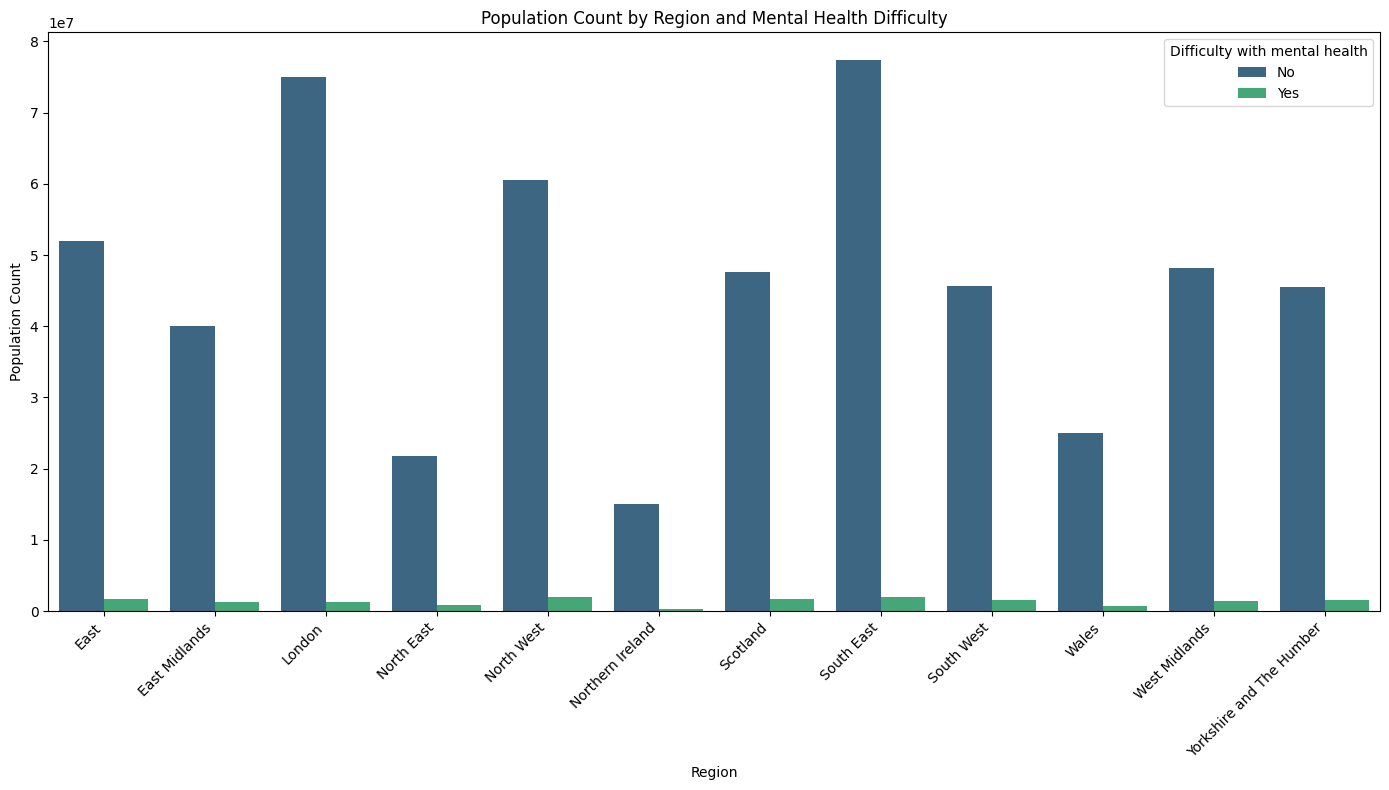

In [101]:
# Visualising Population Count by Region and Mental Health Difficulty.
# Reseting the index to prepare for plotting.
mental_health_over_region = mental_health_over_region.reset_index()

# Plotting grouped bar chart.
plt.figure(figsize=(14, 8))
sns.barplot(
    data=mental_health_over_region, 
    x='Region', 
    y='Population count', 
    hue='Difficulty with mental health', 
    palette='viridis'
)
plt.xticks(rotation=45, ha='right')
plt.title('Population Count by Region and Mental Health Difficulty')
plt.ylabel('Population Count')
plt.xlabel('Region')
plt.tight_layout()
plt.show()

In [102]:
df3 = melted_df[melted_df['Disability status'] == 'Disabled'].reset_index(drop=True)

In [103]:
df3.head()

,Financial year,Difficulty with mental health,Region,Main source of Income,Adult net income,Type of individual,Population count,Employment status,Disability status
0,2002,No,North East,Wages and salaries,0 - 50,Child,0.0,Employee,Disabled
1,2002,No,North East,Wages and salaries,0 - 50,Working-age,0.0,Employee,Disabled
2,2002,No,North East,Wages and salaries,0 - 50,Pensioner,0.0,Employee,Disabled
3,2002,No,North East,Wages and salaries,50 - 99.99,Child,0.0,Employee,Disabled
4,2002,No,North East,Wages and salaries,50 - 99.99,Working-age,4016.0,Employee,Disabled


In [104]:
df3['Adult net income'].unique()

array(['0 - 50', '50 - 99.99', '100 - 149.99', '150 - 199.99',
       '200 - 249.99', '250 - 299.99', '300 - 399.99', '400 - 499.99',
       '>=500'], dtype=object)

In [105]:
# Extract the upper limit of the range
df3['Upper limit'] = df3['Adult net income'].str.split('-').str[1].str.strip().astype(float)

In [115]:
# Filter rows where the upper limit is below 250
filtered_df = df3[df3['Upper limit'] < 250]

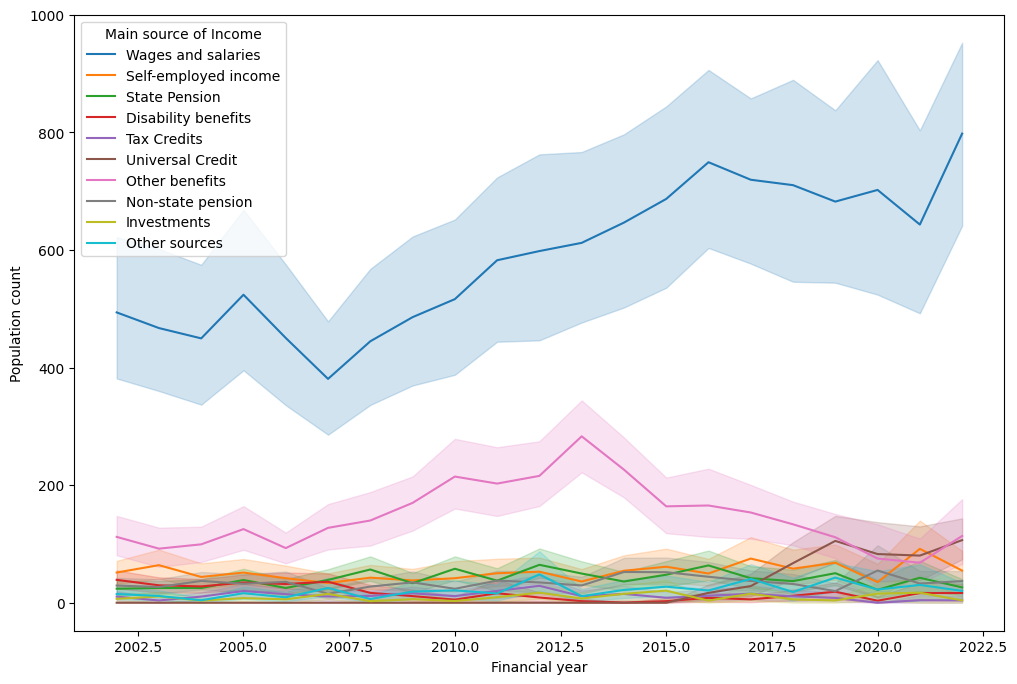

In [119]:
plt.figure(figsize=[12, 8])
sns.lineplot(data=filtered_df, x='Financial year', y='Population count', hue='Main source of Income')
plt.show()

In [107]:
# Exploring Population Count Over Main source of Income by Disability 
# status.
disability_over_income = melted_df.groupby(['Disability status','Main source of Income'])['Population count']\
    .sum()
disability_over_income

Disability status  Main source of Income
Disabled           Disability benefits         384739.0
                   Investments                 271879.0
                   Non-state pension          1523861.0
                   Other benefits             3831773.0
                   Other sources               718608.0
                   Self-employed income       1727837.0
                   State Pension              1217170.0
                   Tax Credits                 888079.0
                   Universal Credit            687759.0
                   Wages and salaries        51606760.0
Not disabled       Disability benefits         552272.0
                   Investments                1953075.0
                   Non-state pension          7041190.0
                   Other benefits            12665124.0
                   Other sources              6024113.0
                   Self-employed income      16280325.0
                   State Pension              4245724.0
       

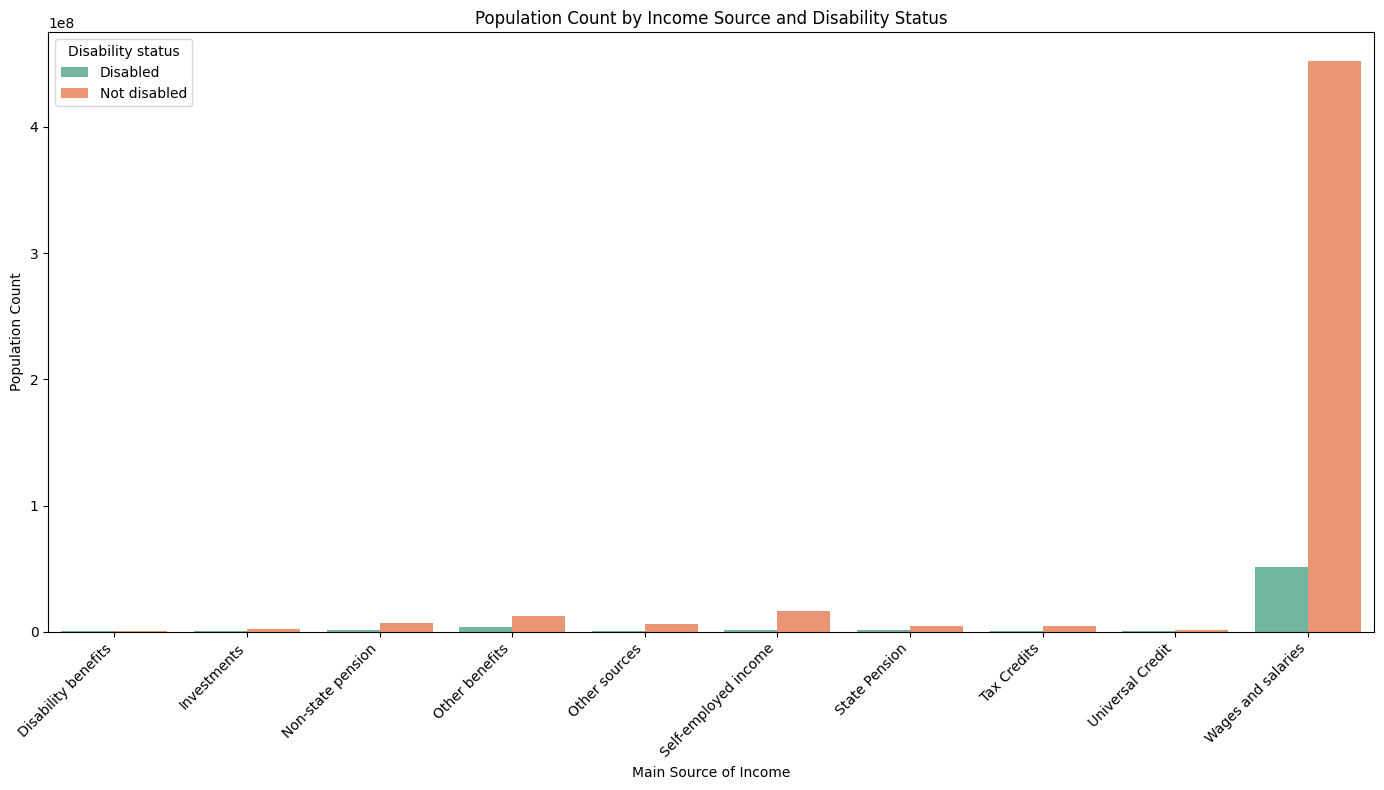

In [108]:
# Visualising Population Count by Income Source and Disability Status.
# Resetting the index for easier plotting.
disability_over_income = disability_over_income.reset_index()

# Plotting grouped bar chart.
plt.figure(figsize=(14, 8))
sns.barplot(
    data=disability_over_income,
    x='Main source of Income',
    y='Population count',
    hue='Disability status',
    palette='Set2'
)
plt.xticks(rotation=45, ha='right')
plt.title('Population Count by Income Source and Disability Status')
plt.ylabel('Population Count')
plt.xlabel('Main Source of Income')
plt.tight_layout()
plt.show()

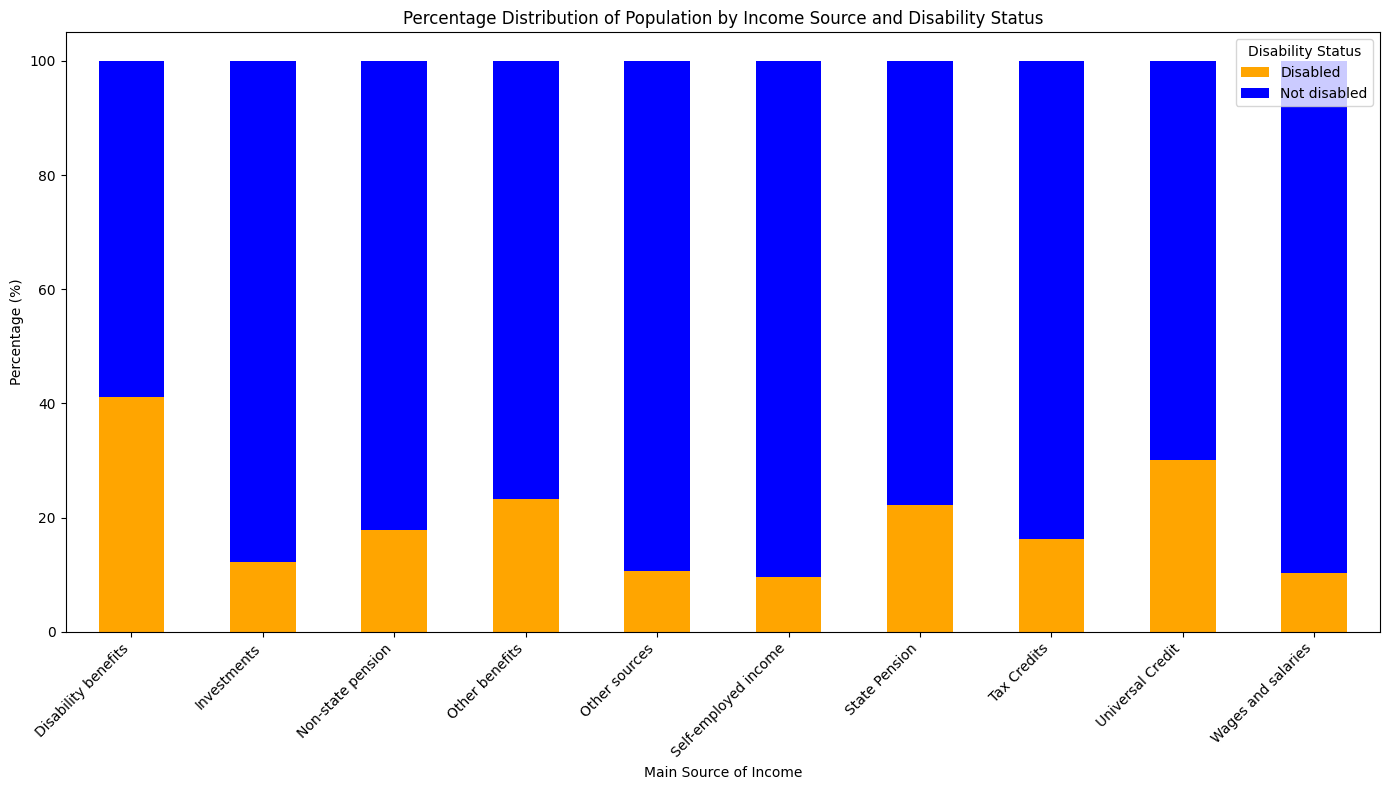

In [109]:
# Visualising Percentage Distribution of Population by Income Source and 
# Disability Status.
# Pivotting data for stacked bar chart.
stacked_data = disability_over_income.pivot(
    index='Main source of Income',
    columns='Disability status',
    values='Population count'
)
# Calculatting percentages for 100% stacked bar chart.
percentage_data = stacked_data.div(stacked_data.sum(axis=1), axis=0) * 100

# Plotting percentage stacked bar chart.
percentage_data.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 8),
    color=['orange', 'blue']
)
plt.title('Percentage Distribution of Population by Income Source and Disability Status')
plt.ylabel('Percentage (%)')
plt.xlabel('Main Source of Income')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Disability Status', loc='upper right')
plt.tight_layout()
plt.show()

In [110]:
# Exploring Population Count Over Employment status by mental health.
mental_health_over_employment = melted_df.groupby(['Difficulty with mental health','Employment status'])['Population count']\
    .sum()
mental_health_over_employment

Difficulty with mental health  Employment status
No                             Employee             525220750.0
                               Unemployed            28433648.0
Yes                            Employee              14685276.0
                               Unemployed             1695427.0
Name: Population count, dtype: float64

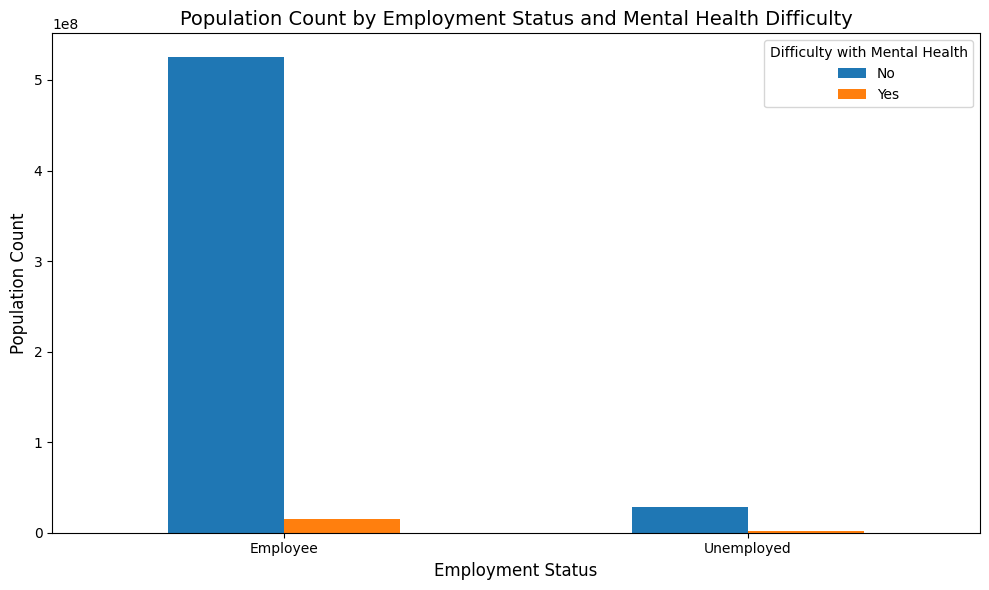

In [111]:
# Visualising Population Count by Employment Status and Mental Health 
# Difficulty.
# Resetting the index for easier visualization.
mental_health_over_employment = mental_health_over_employment.reset_index()

# Pivoting the data for grouped bar chart.
pivot_df = mental_health_over_employment.pivot(index='Employment status', 
                                               columns='Difficulty with mental health', 
                                               values='Population count')

# Plotting the data.
pivot_df.plot(kind='bar', figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])

# Adding labels and title.
plt.title('Population Count by Employment Status and Mental Health Difficulty', fontsize=14)
plt.xlabel('Employment Status', fontsize=12)
plt.ylabel('Population Count', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Difficulty with Mental Health', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

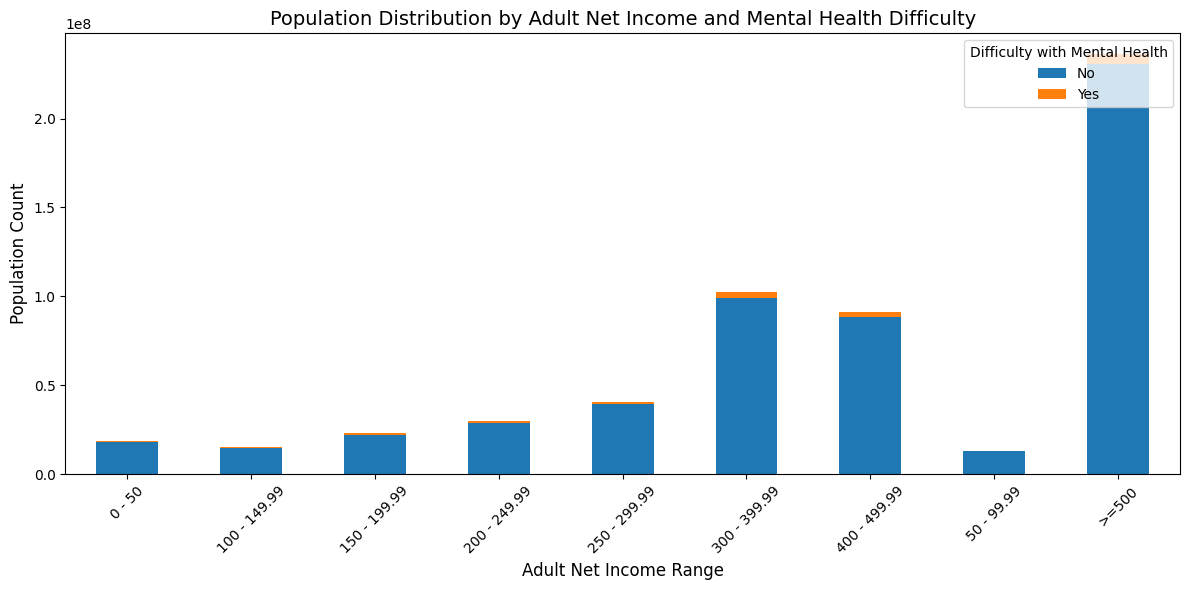

In [112]:
# Grouping the data
income_mental_health = melted_df.groupby(['Adult net income', 'Difficulty with mental health'])['Population count'].sum().unstack()

income_mental_health.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#1f77b4', '#ff7f0e'])

# Add fixed legend location
plt.legend(loc='upper right', title='Difficulty with Mental Health', labels=['No', 'Yes'])

# Titles and labels
plt.title('Population Distribution by Adult Net Income and Mental Health Difficulty', fontsize=14)
plt.xlabel('Adult Net Income Range', fontsize=12)
plt.ylabel('Population Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


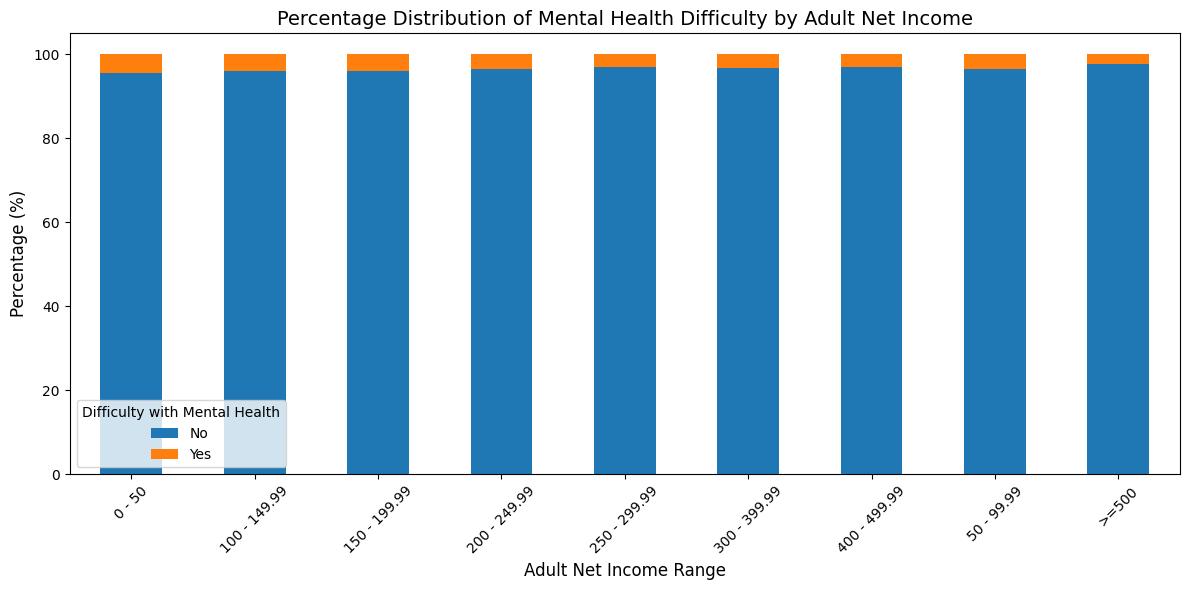

In [113]:
# Converting to percentages
income_mental_health_percentage = income_mental_health.div(income_mental_health.sum(axis=1), axis=0) * 100

# Plotting the percentage stacked bar chart
income_mental_health_percentage.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#1f77b4', '#ff7f0e'])

# Adding labels and title
plt.title('Percentage Distribution of Mental Health Difficulty by Adult Net Income', fontsize=14)
plt.xlabel('Adult Net Income Range', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Difficulty with Mental Health', labels=['No', 'Yes'])
plt.tight_layout()

# Show the plot
plt.show()

In [114]:
# melted_df.to_csv('Modified_FRS_13.csv', index=False)